In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Verify the version of TensorFlow that has been loaded
print(tf.__version__)

2.3.0


In [3]:
def show_generated_examples(examples, n):
    # Show an n-by-n grid of examples
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis("off")
        plt.imshow(examples[i, :, :, 0], cmap = "gray_r")
    plt.show()

---
**[RUN ONLY IF THERE HAS BEEN AN ERROR]**

If the following error occurs:

```
Failed to get convolution algorithm. This is probably because cuDNN failed 
to initialize, so try looking to see if a warning log message was printed 
above.
```
(Note: it may appear with something along the lines of:
`Op:__inference_predict_function_2386` 
or something about `predict_function`)

try running this block ***before*** running the block containing the 
`<MODEL>.predict(...)` call. You may have to shut down all kernels and 
reload in order to clear the GPU memory.


In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for i in range(len(physical_devices)):
       tf.config.experimental.set_memory_growth(physical_devices[i], True)

**[/RUN ONLY IF THERE HAS BEEN AN ERROR]**

---

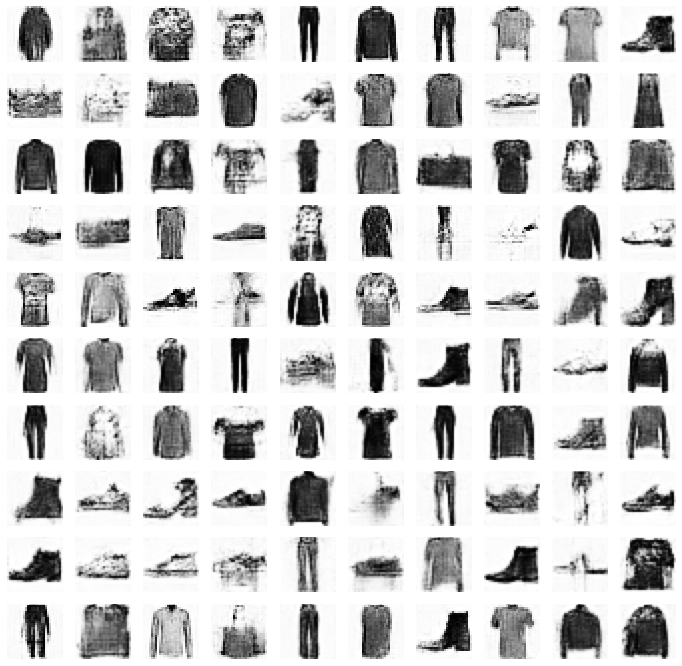

In [7]:
# Load the saved model
g_model = tf.keras.models.load_model("wgan-gp_generator.tf")

# Latent (noise vector) dimension
NOISE_DIM = 128

# Generate the images
random_latent_vectors = tf.random.normal(
    shape=(100, NOISE_DIM)
)
X = g_model.predict(random_latent_vectors)
X = (X * 127.5) + 127.5

# Set the figure size to be bigger than default.
plt.figure(figsize=(12,12))

# Display
show_generated_examples(X, 10)